In [1]:
def get_text(text_file):
    
    cc_values = []
    kl_values = []

    with open(text_file, 'r') as file:
        for line in file:
            if line.startswith('[Training]'):
                parts = line.split()
                for part in parts:
                    if 'cc=' in part:
                        s1 = part.split('=')[1]
                        s1 = s1.replace(",","")
                        f1 = float(s1)
                        cc_values.append(f1)
                    if 'kl=' in part:
                        s2 = part.split('=')[1]
                        s2 = s2.replace("]","")
                        f2 = float(s2)
                        kl_values.append(f2)

    return cc_values, kl_values


In [2]:
epoch0 = list(range(30))
epoch = [i + 1 for i in epoch0]
cc_values_avg = []
kl_values_avg = []

text_name0 = './logs/type0_2023-12-13_19-37-44/CC.txt'
cc_values0, kl_values0 = get_text(text_name0)

text_name1 = './logs/type1_2023-12-13_20-26-41/CC.txt'
cc_values1, kl_values1 = get_text(text_name1)

text_name2 = './logs/type2_2023-12-14_21-10-09/CC.txt'
cc_values2, kl_values2 = get_text(text_name2)

text_name3 = './logs/type3_2023-12-15_09-25-23/CC.txt'
cc_values3, kl_values3 = get_text(text_name3)

text_name4 = './logs/type4_2023-12-13_17-36-13/CC.txt'
cc_values4, kl_values4 = get_text(text_name4)

for i in range(30):
    sum_cc = cc_values0[i] + cc_values1[i] + cc_values2[i] + cc_values3[i] + cc_values4[i]
    average_cc = sum_cc / 5
    sum_kl = kl_values0[i] + kl_values1[i] + kl_values2[i] + kl_values3[i] + kl_values4[i]
    average_kl = sum_kl / 5
    cc_values_avg.append(average_cc)
    kl_values_avg.append(average_kl)

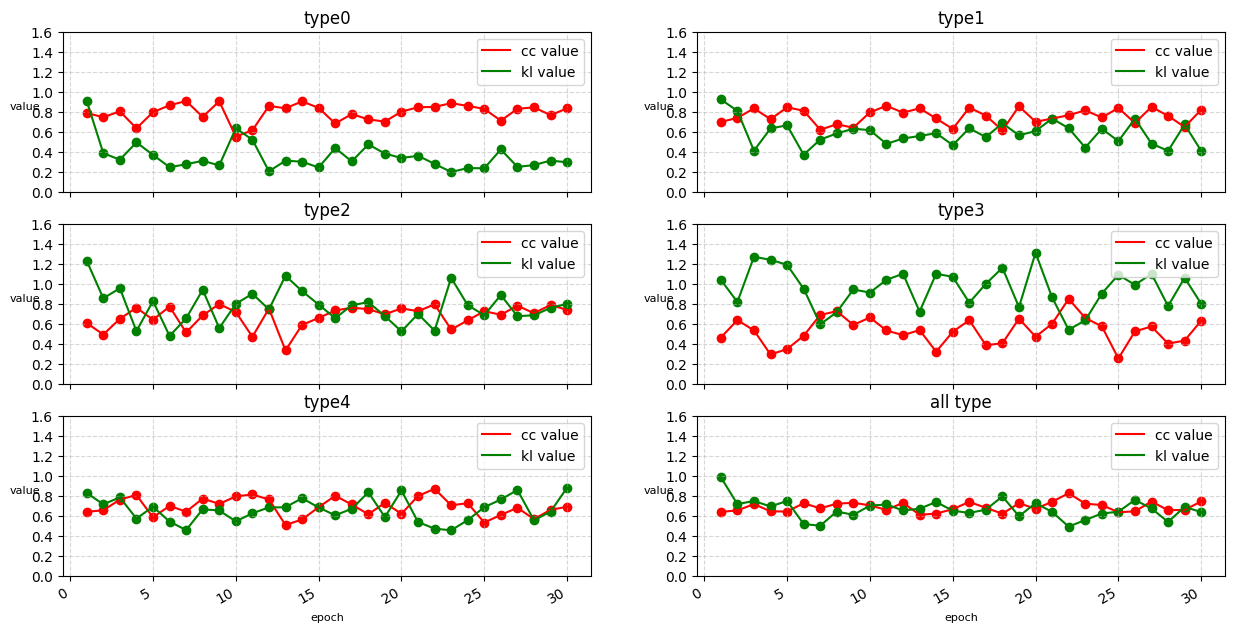

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), dpi=100)
axs = axs.flatten()

cc_values = [cc_values0, cc_values1, cc_values2, cc_values3, cc_values4, cc_values_avg]
kl_values = [kl_values0, kl_values1, kl_values2, kl_values3, kl_values4, kl_values_avg]

for i in range(6):
    axs[i].plot(epoch, cc_values[i], c='red', label='cc value')
    axs[i].plot(epoch, kl_values[i], c='green', label='kl value')
    axs[i].scatter(epoch, cc_values[i], c='red')
    axs[i].scatter(epoch, kl_values[i], c='green')
    axs[i].legend(loc='best')
    axs[i].set_yticks(np.arange(0, 1.8, 0.2))
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].set_xlabel("epoch", fontdict={'size': 8})
    axs[i].set_ylabel('value', fontdict={'size': 8}, rotation=0)
    if i < 5:
        title = "type{}".format(i)
    else:
        title = str('all type')
    axs[i].set_title(title, fontdict={'size': 12})

fig.autofmt_xdate()
plt.show()

In [4]:
def get_value(logfile):
    
    val_kl = []
    val_cc = []
    val_nss = []
    
    with open(logfile, 'r') as file:
        for line in file:
                parts = line.split()
                for part in parts:
                    if 'val_kl=' in part:
                        s1 = part.split('=')[1]
                        f1 = float(s1)
                        val_kl.append(f1)
                    if 'val_cc=' in part:
                        s2 = part.split('=')[1]
                        f2 = float(s2)
                        val_cc.append(f2)
                    if 'val_nss=' in part:
                        s3 = part.split('=')[1]
                        f3 = float(s3)
                        val_nss.append(f3)

    return val_kl, val_cc, val_nss


In [5]:
val_kl_avg = []
val_cc_avg = []
val_nss_avg = []

log_file0 = './logs/type0_2023-12-13_19-37-44/train.log'
val_kl0, val_cc0, val_nss0 = get_value(log_file0)

log_file1 = './logs/type1_2023-12-13_20-26-41/train.log'
val_kl1, val_cc1, val_nss1 = get_value(log_file1)

log_file2 = './logs/type2_2023-12-14_21-10-09/train.log'
val_kl2, val_cc2, val_nss2 = get_value(log_file2)

log_file3 = './logs/type3_2023-12-15_09-25-23/train.log'
val_kl3, val_cc3, val_nss3 = get_value(log_file3)

log_file4 = './logs/type4_2023-12-13_17-36-13/train.log'
val_kl4, val_cc4, val_nss4 = get_value(log_file4)

for i in range(30):
    sum_val_cc = val_cc0[i] + val_cc1[i] + val_cc2[i] + val_cc3[i] + val_cc4[i]
    average_val_cc = sum_val_cc / 5
    sum_val_kl = val_kl0[i] + val_kl1[i] + val_kl2[i] + val_kl3[i] + val_kl4[i]
    average_val_kl = sum_val_kl / 5
    sum_val_nss = val_nss1[i] + val_nss1[i] + val_nss2[i] + val_nss3[i] + val_nss4[i]
    average_value_nss = sum_val_nss / 5
    val_cc_avg.append(average_val_cc)
    val_kl_avg.append(average_val_kl)
    val_nss_avg.append(average_value_nss)

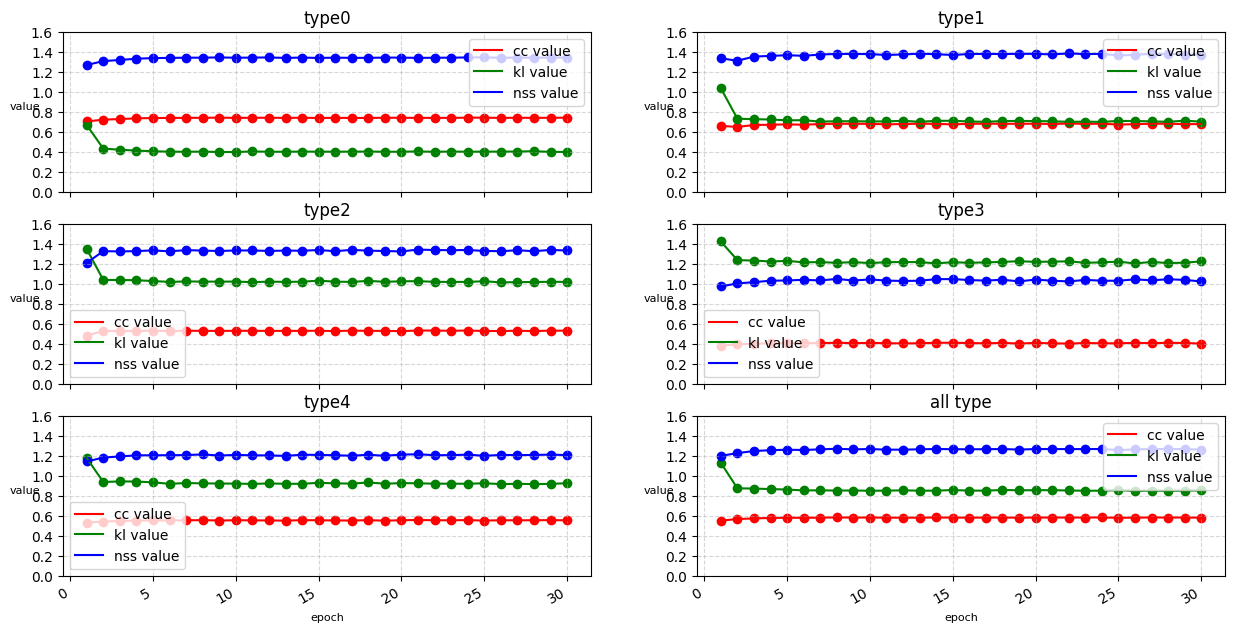

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), dpi=100)
axs = axs.flatten()

val_ccs = [val_cc0, val_cc1, val_cc2, val_cc3, val_cc4, val_cc_avg]
val_kls = [val_kl0, val_kl1, val_kl2, val_kl3, val_kl4, val_kl_avg]
val_nsss = [val_nss0, val_nss1, val_nss2, val_nss3, val_nss4, val_nss_avg]

for i in range(6):
    axs[i].plot(epoch, val_ccs[i], c='red', label='cc value')
    axs[i].plot(epoch, val_kls[i], c='green', label='kl value')
    axs[i].plot(epoch, val_nsss[i], c='blue', label='nss value')
    axs[i].scatter(epoch, val_ccs[i], c='red')
    axs[i].scatter(epoch, val_kls[i], c='green')
    axs[i].scatter(epoch, val_nsss[i], c='blue')
    axs[i].legend(loc='best')
    axs[i].set_yticks(np.arange(0, 1.8, 0.2))
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].set_xlabel("epoch", fontdict={'size': 8})
    axs[i].set_ylabel('value', fontdict={'size': 8}, rotation=0)
    if i < 5:
        title = "type{}".format(i)
    else:
        title = str('all type')
    axs[i].set_title(title, fontdict={'size': 12})

fig.autofmt_xdate()
plt.show()